In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
import statsmodels.nonparametric.api as smnp
from sklearn.linear_model import LinearRegression
from matplotlib.patches import Rectangle

In [2]:
react=pd.read_table('data/react_raw.csv', index_col=False)
# react.set_index('sub', inplace=True)

In [3]:
react=react[react['cond']==1]
react.drop('cond', axis=1, inplace=True)
react['zero']=0

In [4]:
def distance(array, x1, y1, x2, y2, new_col):
    dx=array[x2]-array[x1]
    dy=array[y2]-array[y1]
    array[new_col]=np.sqrt(dx**2+dy**2)
    return array

In [5]:
distance(react, 'x', 'y', 'x1', 'y1', 't1_orig_dist')
distance(react, 'x', 'y', 'x2', 'y2', 't2_orig_dist')
distance(react, 'x1', 'y1', 'x2', 'y2', 't2_t1_dist')
distance(react, 'x', 'y', 'x3', 'y3', 't3_orig_dist')
distance(react, 'x1', 'y1', 'x3', 'y3', 't3_t1_dist')
distance(react, 'x2', 'y2', 'x3', 'y3', 't3_t2_dist')

,sub,x,y,x1,y1,x2,y2,x3,y3,t1_rt,...,t1_order,t2_order,t3_order,zero,t1_orig_dist,t2_orig_dist,t2_t1_dist,t3_orig_dist,t3_t1_dist,t3_t2_dist
0,401,-46,-193,-47,-200,-74,-158,-47,-159,660,...,145,6,2,0,7.071068,44.821870,49.929951,34.014703,41.000000,27.018512
1,401,258,-104,250,-87,239,-78,255,-82,580,...,90,25,159,0,18.788294,32.202484,14.212670,22.203603,7.071068,16.492423
2,401,-236,265,-237,288,-248,301,-243,298,440,...,48,102,35,0,23.021729,37.947332,17.029386,33.734256,11.661904,5.830952
3,401,-123,200,-126,225,-116,182,-141,212,440,...,127,33,107,0,25.179357,19.313208,44.147480,21.633308,19.849433,39.051248
4,401,-33,-289,-27,-255,-110,125,-88,-126,1760,...,54,103,13,0,34.525353,421.099751,388.958867,172.029067,142.695480,251.962299
5,401,-177,-172,-213,-179,-252,-3,-215,-181,600,...,176,45,22,0,36.674242,184.894565,180.269243,39.051248,2.828427,181.804840
6,401,-225,142,-186,128,-116,221,132,221,340,...,85,58,27,0,41.436699,134.617978,116.400172,365.636431,331.320087,248.000000
7,401,133,93,176,71,241,82,240,85,320,...,7,19,8,0,48.301139,108.558740,65.924199,107.298649,65.513357,3.162278
8,401,163,180,142,135,165,137,148,117,400,...,140,66,108,0,49.658836,43.046487,23.086793,64.761099,18.973666,26.248809
9,401,-185,4,-239,-6,-252,-76,-250,-91,400,...,15,15,51,0,54.918121,104.350371,71.196910,115.108644,85.708809,15.132746


In [6]:
distance(react, 'x', 'y', 'zero', 'zero', 'orig_center_dist')
distance(react, 'x1', 'y1', 'zero', 'zero', 't1_center_dist')
distance(react, 'x2', 'y2', 'zero', 'zero', 't2_center_dist')
distance(react, 'x3', 'y3', 'zero', 'zero', 't3_center_dist')

,sub,x,y,x1,y1,x2,y2,x3,y3,t1_rt,...,t1_orig_dist,t2_orig_dist,t2_t1_dist,t3_orig_dist,t3_t1_dist,t3_t2_dist,orig_center_dist,t1_center_dist,t2_center_dist,t3_center_dist
0,401,-46,-193,-47,-200,-74,-158,-47,-159,660,...,7.071068,44.821870,49.929951,34.014703,41.000000,27.018512,198.406149,205.448290,174.470628,165.801086
1,401,258,-104,250,-87,239,-78,255,-82,580,...,18.788294,32.202484,14.212670,22.203603,7.071068,16.492423,278.172608,264.705497,251.406046,267.860038
2,401,-236,265,-237,288,-248,301,-243,298,440,...,23.021729,37.947332,17.029386,33.734256,11.661904,5.830952,354.853491,372.978552,390.006410,384.516580
3,401,-123,200,-126,225,-116,182,-141,212,440,...,25.179357,19.313208,44.147480,21.633308,19.849433,39.051248,234.795656,257.877878,215.824002,254.607541
4,401,-33,-289,-27,-255,-110,125,-88,-126,1760,...,34.525353,421.099751,388.958867,172.029067,142.695480,251.962299,290.877981,256.425428,166.508258,153.687996
5,401,-177,-172,-213,-179,-252,-3,-215,-181,600,...,36.674242,184.894565,180.269243,39.051248,2.828427,181.804840,246.805592,278.226526,252.017857,281.044480
6,401,-225,142,-186,128,-116,221,132,221,340,...,41.436699,134.617978,116.400172,365.636431,331.320087,248.000000,266.062023,225.787511,249.593670,257.419890
7,401,133,93,176,71,241,82,240,85,320,...,48.301139,108.558740,65.924199,107.298649,65.513357,3.162278,162.289864,189.781453,254.568262,254.607541
8,401,163,180,142,135,165,137,148,117,400,...,49.658836,43.046487,23.086793,64.761099,18.973666,26.248809,242.835335,195.931110,214.462118,188.661072
9,401,-185,4,-239,-6,-252,-76,-250,-91,400,...,54.918121,104.350371,71.196910,115.108644,85.708809,15.132746,185.043238,239.075302,263.210942,266.046988


In [7]:
def get_quad(array, x, y, new_col):
    for sub, row in array.iterrows():
        if (array.loc[sub, x]<0) & (array.loc[sub, y]<0):
                array.loc[sub, new_col]=3
        elif (array.loc[sub, x]<0) & (array.loc[sub, y]>0):
                array.loc[sub, new_col]=2    
        elif (array.loc[sub, x]>0) & (array.loc[sub, y]<0):
                array.loc[sub, new_col]=4    
        elif (array.loc[sub, x]>0) & (array.loc[sub, y]>0):
                array.loc[sub, new_col]=1    
        else: array.loc[sub, new_col]=np.nan    
    return array

In [8]:
get_quad(react, 'x', 'y', 'loc_quad')
get_quad(react, 'x1', 'y1', 'loc1_quad')
get_quad(react, 'x2', 'y2', 'loc2_quad')
get_quad(react, 'x3', 'y3', 'loc3_quad')

,sub,x,y,x1,y1,x2,y2,x3,y3,t1_rt,...,t3_t1_dist,t3_t2_dist,orig_center_dist,t1_center_dist,t2_center_dist,t3_center_dist,loc_quad,loc1_quad,loc2_quad,loc3_quad
0,401,-46,-193,-47,-200,-74,-158,-47,-159,660,...,41.000000,27.018512,198.406149,205.448290,174.470628,165.801086,3.0,3.0,3.0,3.0
1,401,258,-104,250,-87,239,-78,255,-82,580,...,7.071068,16.492423,278.172608,264.705497,251.406046,267.860038,4.0,4.0,4.0,4.0
2,401,-236,265,-237,288,-248,301,-243,298,440,...,11.661904,5.830952,354.853491,372.978552,390.006410,384.516580,2.0,2.0,2.0,2.0
3,401,-123,200,-126,225,-116,182,-141,212,440,...,19.849433,39.051248,234.795656,257.877878,215.824002,254.607541,2.0,2.0,2.0,2.0
4,401,-33,-289,-27,-255,-110,125,-88,-126,1760,...,142.695480,251.962299,290.877981,256.425428,166.508258,153.687996,3.0,3.0,2.0,3.0
5,401,-177,-172,-213,-179,-252,-3,-215,-181,600,...,2.828427,181.804840,246.805592,278.226526,252.017857,281.044480,3.0,3.0,3.0,3.0
6,401,-225,142,-186,128,-116,221,132,221,340,...,331.320087,248.000000,266.062023,225.787511,249.593670,257.419890,2.0,2.0,2.0,1.0
7,401,133,93,176,71,241,82,240,85,320,...,65.513357,3.162278,162.289864,189.781453,254.568262,254.607541,1.0,1.0,1.0,1.0
8,401,163,180,142,135,165,137,148,117,400,...,18.973666,26.248809,242.835335,195.931110,214.462118,188.661072,1.0,1.0,1.0,1.0
9,401,-185,4,-239,-6,-252,-76,-250,-91,400,...,85.708809,15.132746,185.043238,239.075302,263.210942,266.046988,2.0,3.0,3.0,3.0


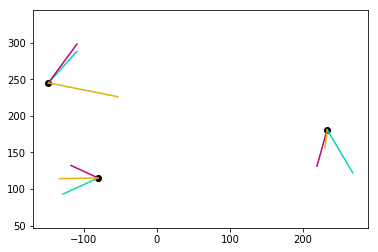

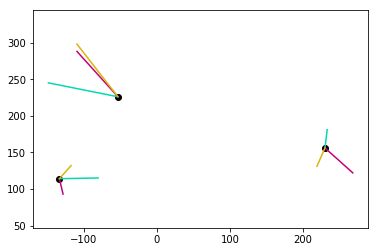

In [18]:
def generate_coord_dict(array):
    axis_list=[]
    for x_or_y in ['x', 'y']:
        axis_list=axis_list+ [x_or_y, x_or_y+'1', x_or_y+'2', x_or_y+'3']
    coord_dict={coord:array.loc[99:101, coord] for coord in axis_list}
    return coord_dict

coord_dict=generate_coord_dict(react)
coord_dict

#forgetting
plt.plot(coord_dict['x'],coord_dict['y'], 'ko') #original location
def connectpoints(x,y,x1,y1, linecolor):
    plt.plot([x,x1],[y,y1], linecolor)

connectpoints(coord_dict['x'],coord_dict['y'],coord_dict['x1'],coord_dict['y1'], 'xkcd:aquamarine')
connectpoints(coord_dict['x'],coord_dict['y'],coord_dict['x2'],coord_dict['y2'], 'xkcd:magenta')
connectpoints(coord_dict['x'],coord_dict['y'],coord_dict['x3'],coord_dict['y3'], 'xkcd:gold')

plt.axis('equal')
plt.show()

#updating
plt.plot(coord_dict['x3'],coord_dict['y3'], 'ko') #original location
connectpoints(coord_dict['x3'],coord_dict['y3'],coord_dict['x'],coord_dict['y'], 'xkcd:aquamarine')
connectpoints(coord_dict['x3'],coord_dict['y3'],coord_dict['x1'],coord_dict['y1'], 'xkcd:magenta')
connectpoints(coord_dict['x3'],coord_dict['y3'],coord_dict['x2'],coord_dict['y2'], 'xkcd:gold')

plt.axis('equal')
plt.show()



In [9]:
means=pd.DataFrame(react.groupby(['sub'])['t1_orig_dist', 't2_orig_dist', 't2_t1_dist','t3_orig_dist', 't3_t1_dist', 't3_t2_dist'].mean())
means.reset_index(inplace=True)
means

,sub,t1_orig_dist,t2_orig_dist,t2_t1_dist,t3_orig_dist,t3_t1_dist,t3_t2_dist
0,401,156.956924,191.791047,148.566642,188.032920,152.095119,108.285758
1,402,164.226589,191.123570,145.660186,205.922832,144.426903,148.840465
2,403,152.453302,188.560901,188.556597,206.351806,174.860755,139.029322
3,404,183.216703,259.102723,201.026774,260.973939,228.828199,200.154791
4,405,225.121252,304.672668,268.249291,291.929951,261.018961,235.482037
5,406,77.256586,92.764175,77.464027,106.273281,83.746615,73.186137
6,407,109.002043,149.355296,106.731983,163.738796,115.304976,105.807416
7,408,129.197827,209.879409,192.213768,226.614278,211.812169,193.728012
8,409,110.787505,149.690228,125.585457,161.866591,130.600633,105.538951
9,410,94.335044,147.731585,126.650297,140.953734,121.058493,114.604932


In [10]:
t2_list=['t2_orig_dist', 't2_t1_dist']
t3_list=['t3_orig_dist', 't3_t1_dist', 't3_t2_dist']
orig_list=['t1_orig_dist', 't2_orig_dist', 't3_orig_dist']
def melt_distances(means, condlist, day):
    tidy_dists=means.melt(id_vars=['sub'], value_vars=condlist, 
              var_name=day +'_measure', value_name=day+'_dist')
    return tidy_dists
t2=melt_distances(means, t2_list, 't2')
t3=melt_distances(means, t3_list, 't3')
orig=melt_distances(means, orig_list, 'orig')


In [11]:
t3_wide=react[t3_list]
t3_wide.rename(columns={'t3_orig_dist':'Original Location', 
                        't3_t1_dist': 'Day 1 Test Location', 't3_t2_dist':'Day 2 Test Location'}, inplace=True)

orig_wide=react[orig_list]
orig_wide.rename(columns={'t1_orig_dist':'Day 1 Test', 't2_orig_dist':'Day 2 Test', 
                          't3_orig_dist': 'Day 3 Test'}, inplace=True)

/Users/drdj/.pyenv/versions/3.6.5/lib/python3.6/site-packages/pandas/core/frame.py:3027: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


In [12]:
orig['orig_measure']=orig['orig_measure'].map({'t1_orig_dist':'Day 1 Test', 
                                               't2_orig_dist':'Day 2 Test', 't3_orig_dist': 'Day 3 Test'})
t3['t3_measure']=t3['t3_measure'].map({'t3_orig_dist':'Original Location', 
                                               't3_t1_dist':'Day 1 Test Location', 't3_t2_dist': 'Day 2 Test Location'})

In [ ]:
line=sns.pointplot(x='orig_measure', y='orig_dist', data=orig, palette='Set2')
plt.ylim(0, 230)
linefig=line.get_figure()
linefig.savefig('figs/react_forgetting_linefig' + '.png')

In [ ]:
line=sns.pointplot(x='t3_measure', y='t3_dist', data=t3, palette='Set2')
plt.ylim(0, 230)
linefig=line.get_figure()
linefig.savefig('figs/react_day3_linefig' + '.png')

In [ ]:
orig_wide

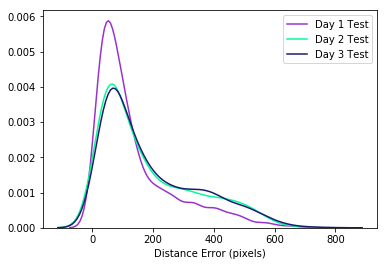

<Figure size 432x288 with 0 Axes>

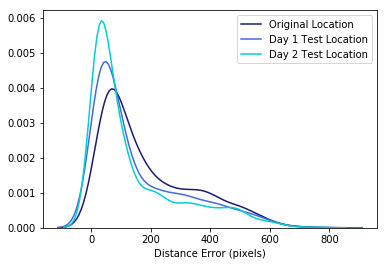

<Figure size 432x288 with 0 Axes>

In [13]:
t3_legend=['Original Location','Day 1 Test Location','Day 2 Test Location']
orig_legend=['Day 1 Test', 'Day 2 Test', 'Day 3 Test']
update_colors = ['midnightblue', 'royalblue', 'darkturquoise']
forget_colors = ['darkorchid', 'mediumspringgreen', 'midnightblue']

def make_layered_hist(array, condlist, condname, colorlist):
    fig, ax = plt.subplots()
    for cond, color in zip(condlist, colorlist):
        hist_kde=sns.kdeplot(array[cond], ax=ax, label=cond, color=color)
        ax.legend()
        ax.set_xlabel('Distance Error (pixels)')
    plt.show()
    hist_kde=hist_kde.get_figure()
    hist_kde.savefig('figs/react_kde' + condname + '.png')
    plt.clf()
make_layered_hist(orig_wide, orig_legend, 'Forgetting', forget_colors)
make_layered_hist(t3_wide, t3_legend, 'Updating', update_colors)

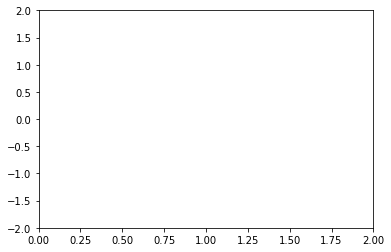

In [19]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import animation

# First set up the figure, the axis, and the plot element we want to animate
fig = plt.figure()
ax = plt.axes(xlim=(0, 2), ylim=(-2, 2))
line, = ax.plot([], [], lw=2)

# initialization function: plot the background of each frame
def init():
    line.set_data([], [])
    return line,

# animation function.  This is called sequentially
def animate(i):
    x = np.linspace(0, 2, 1000)
    y = np.sin(2 * np.pi * (x - 0.01 * i))
    line.set_data(x, y)
    return line,

# call the animator.  blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=200, interval=20, blit=True)

# save the animation as an mp4.  This requires ffmpeg or mencoder to be
# installed.  The extra_args ensure that the x264 codec is used, so that
# the video can be embedded in html5.  You may need to adjust this for
# your system: for more information, see
# http://matplotlib.sourceforge.net/api/animation_api.html
# anim.save('basic_animation.mp4', fps=30, extra_args=['-vcodec', 'libx264'])

plt.show()

In [16]:
make_layered_hist(orig_wide, orig_legend, 'Forgetting', color_list)

NameError: name 'color_list' is not defined

In [ ]:
cmap = plt.get_cmap('Set2')
original = cmap(5)
update =cmap(4)
[print(c) for c in cmap]

In [ ]:
from matplotlib.pyplot import cm

cmap = plt.get_cmap('Set2')
color=iter(cm.rainbow(np.linspace(0,1,2)))

for dist in t2_list:
    co=next(color)
    hist_kde=[sns.distplot(react[dist], color=c, norm_hist=True, 
                axlabel='Distance Error (pixels)', hist_kws={'alpha':.5}) for c in color]
    handles = Rectangle((0,0),1,1,color=co,edgecolor="k", alpha=.75)
    labels= ["Updated", "Original",]
    plt.legend(handles, labels)

In [ ]:
hist_kde=sns.distplot(react['t3_orig_dist'], color='Green', norm_hist=True, hist_kws={'alpha':.5})
hist_kde=sns.distplot(react['t3_t2_dist'], color='Orange', axlabel='Distance Error (pixels)', norm_hist=True, hist_kws={'alpha':.25})
handles = [Rectangle((0,0),1,1,color=c,ec="k", alpha=.75) for c in [original, update]]
labels= ["Updated", "Original",]
plt.legend(handles, labels)
hist_kde=hist_kde.get_figure()
hist_kde.savefig('react_hist_kde.png')

In [ ]:
cum_kde=sns.distplot(react['t3_orig_dist'], color='Green',
             hist_kws=dict(cumulative=True),
             kde_kws=dict(cumulative=True))
cum_kde=sns.distplot(react['t3_t2_dist'], color='Orange',
             hist_kws=dict(cumulative=True),
             kde_kws=dict(cumulative=True))
plt.xlabel('Distance Error (pixels)')
plt.xlabel('Proportion of Trials')
handles = [Rectangle((0,0),1,1,color=c,ec="k", alpha=.75) for c in [original, update]]
labels= ["Original","Updated"]
plt.legend(handles, labels)
cum_kde=cum_kde.get_figure()
cum_kde.savefig('react_cum_kde.png')

In [ ]:
finaldist=pd.melt(react, id_vars=['x', 'y', 'x1', 'y1', 'x2', 'y2', 'x3', 'y3',
                                  't1_orig_dist', 't2_orig_dist'],
                                  value_vars=['t3_orig_dist', 't3_t2_dist'],
                  var_name='final_mem',value_name='final_dist')
finaldist

In [ ]:
viosplit=sns.violinplot(x="final_mem", y="final_dist", data=finaldist, palette="Set2")
plt.xticks([0,1],['Original', 'Updated'])
plt.xlabel('Location')
plt.ylabel('Distance Error (pixels)')

In [ ]:
bar=sns.barplot(x="final_mem", y="final_dist", data=finaldist, palette="Set2")
plt.xticks([0,1],['Original', 'Updated'])
plt.xlabel('Location')
plt.ylabel('Mean Distance Error (pixels)')

In [ ]:
strip=sns.factorplot(x="final_mem", y="final_dist", 
               data=finaldist, kind="strip", jitter=True, palette='Set2');
plt.xticks([0,1],['Original', 'Updated'])
plt.xlabel('Location')
plt.ylabel('Mean Distance Error (pixels)')

In [ ]:
strip=sns.factorplot(x="final_mem", y="final_dist", 
               data=finaldist, kind="swarm", palette='Set2');
plt.xticks([0,1],['Original', 'Updated'])
plt.xlabel('Location')
plt.ylabel('Mean Distance Error (pixels)')

In [ ]:
sns.lmplot('t2_t1_dist', # Horizontal axis
           't3_t2_dist', # Vertical axis
           data=react, # Data source
           fit_reg=True, # Don't fix a regression line
           scatter_kws={"marker": "D", # Set marker style
                        "s": 100}) # S marker size

In [ ]:
corr=react.drop(['sub', 'zero','x', 'y', 'x1', 'y1', 'x2', 'y2', 'x3', 'y3'], axis=1)
corr.columns

In [ ]:
sns.heatmap(corr.corr(), vmin=-1, vmax=1, center=0, cmap='coolwarm',
            square=True, linewidths=.5)

In [ ]:
corr.corr()

In [ ]:
def doKMeans(df, num_clusters):
    # Let's plot your data with a '.' marker, a 0.3 alpha at the Longitude,
    # and Latitude locations in your dataset. Longitude = x, Latitude = y
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.scatter(df.x, df.y, marker='.', alpha=0.3)

    dfloc=df[['x2', 'y2']]
    
    model=KMeans(n_clusters=num_clusters)
    model.fit(dfloc)
    colorlist=['r', 'k', 'b', 'g']
    # Now we can print and plot the centroids:
    centroids = model.cluster_centers_
    print(centroids)
    ax.scatter(centroids[:,0], centroids[:,1], marker='x', c=colorlist, alpha=0.5, linewidths=3, s=169)
#     ax.set_xlim([-97,-96.5])
#     ax.set_ylim([32.5,33])
    plt.show()
    return model

In [ ]:
doKMeans(react, 5)

In [ ]:
rg=(react['t3_t2_dist']>360) & (react['t3_orig_dist']>360)
react_guess=react[rg]
react_mem=react[~rg]
react_mem
react_mem['update']=react_mem['t3_t2_dist']<react_mem['t3_orig_dist']
react_guess['update']=2

react=react_mem.append(react_guess, ignore_index=True)

In [ ]:
react

In [ ]:
y=react['update'].map({True:1, False:0})

In [ ]:
y=react['update']

In [ ]:
react.dropna(axis=1, inplace=True)

In [ ]:
X=react.drop(['sub', 'zero','x', 'y', 'x1', 'y1', 'x2', 'y2', 'x3', 'y3', 't3_orig_dist', 't3_t2_dist', 'update'], axis=1)
X.columns

In [ ]:
y_up=react['t3_t2_dist']
y_mem=react['t3_orig_dist']

In [ ]:
X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=.3)
forest=RandomForestClassifier(max_depth=5)
forest.fit(X_train, y_train)
forest.predict(X_test)
forest.score(X_test, y_test)

In [ ]:
forest.predict(X_test)

In [ ]:
scores=list(zip(X.columns, forest.feature_importances_))
scores=pd.Series(data=forest.feature_importances_, index=X.columns)
scores=scores.sort_values(ascending=False)
scores

In [ ]:
X_train, X_test, y_train, y_test=train_test_split(X,y_mem, test_size=.3)
forest_reg=RandomForestRegressor(max_depth=3)
forest_reg.fit(X_train, y_train)
# forest_reg.predict(X_test)
forest_reg.score(X_test, y_test)

In [ ]:
scores=list(zip(X.columns, forest_reg.feature_importances_))
scores=pd.Series(data=forest_reg.feature_importances_, index=X.columns)
scores=scores.sort_values(ascending=False)
scores

In [ ]:
sns.pairplot(data=react[['t1_orig_dist', 't2_orig_dist', 't2_t1_dist', 't3_orig_dist']], plot_kws={'alpha':.25})

In [ ]:
X_train, X_test, y_train, y_test=train_test_split(X,y_up, test_size=.3)
forest_reg=RandomForestRegressor(max_depth=4)
forest_reg.fit(X_train, y_train)
# forest_reg.predict(X_test)
forest_reg.score(X_test, y_test)

In [ ]:
scores=list(zip(X.columns, forest_reg.feature_importances_))
scores=pd.Series(data=forest_reg.feature_importances_, index=X.columns)
scores=scores.sort_values(ascending=False)
scores

In [ ]:
sns.pairplot(hue='sub', data=react[['sub', 't2_orig_dist', 't2_t1_dist', 't3_t2_dist']], plot_kws={'alpha':.75})

In [ ]:
x=react['t2_orig_dist']
y=react['t3_orig_dist']
sns.residplot(x, y, lowess=True, color="g")

In [ ]:
x=react['t2_t1_dist']
y=react['t3_t2_dist']
sns.residplot(x, y, lowess=True, color="Orange")